In [46]:
#Importando bibliotecas & limpando os dados

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

url = "DAT_ASCII_EURUSD_M1_2018.csv"
df = pd.read_csv(url, delimiter = ';', header = None, names = ["Data", "Open", "High", "Low", "Close", "Volume"], parse_dates = ["Data"])
df.set_index("Data", inplace = True) 
df.index.names = [None]
df = df.drop("Volume", axis=1)                                                    
df.index = df.index.tz_localize('EST').tz_convert('Brazil/West').tz_localize(None)
df.head()

,Open,High,Low,Close
2018-01-01 18:00:00,1.20037,1.20100,1.20037,1.20100
2018-01-01 18:01:00,1.20083,1.20095,1.20017,1.20030
2018-01-01 18:02:00,1.20035,1.20043,1.20035,1.20043
2018-01-01 18:03:00,1.20041,1.20050,1.20031,1.20046
2018-01-01 18:04:00,1.20049,1.20049,1.20046,1.20048


In [47]:
# Aplicando condicionais nos dados
#Cor da vela(1 - Verde, -1 - Vermelho, 0 - Cinza)

df.loc[(df.Close > df.Open), 'Label'] = 1
df.loc[(df.Close < df.Open), 'Label'] = -1
df.loc[(df.Close == df.Open), 'Label'] = 0



In [48]:
#Sequências de cores de vela

df["Seq"] = df.groupby((df["Label"] != df["Label"].shift(1)).cumsum()).cumcount()+1

df.loc[(df.Seq.shift(-1) > df.Seq), 'Stoch'] = None
df.loc[(df.Seq.shift(-1) <= df.Seq), 'Stoch'] = df.Seq
df.loc[(df.Label == 0), 'Stoch'] = None

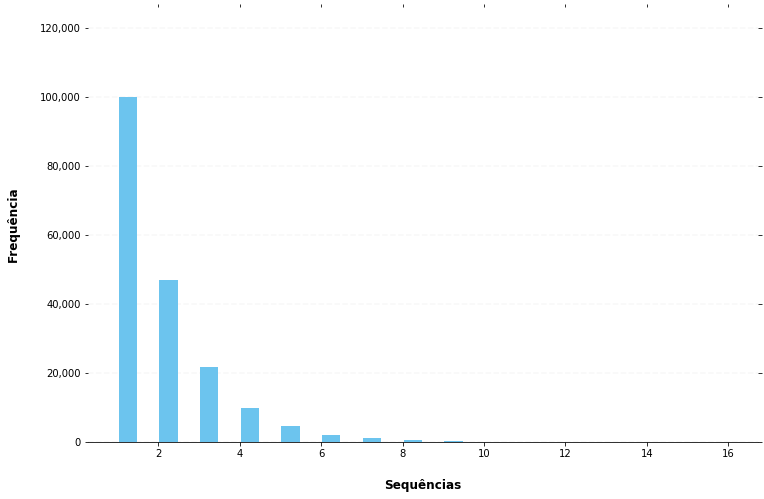

In [49]:
#Plotando o histograma (bins = ajustar conforme os dados)

ax = df.hist(column='Stoch', bins=30, grid=False, figsize=(12,8), color='#6CC4EE', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Sequências", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Frequência", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [84]:
hist = df["Stoch"].value_counts()
hist = pd.DataFrame(hist)
hist.columns = ['Count']
hist['%'] = (hist['Count']/hist['Count'].sum()) * 100
hist['%'] = hist['%'].apply(lambda x:round(x,2))
hist['% acumulada'] = (hist['%'].cumsum())
hist


,Count,%,% acumulada
1.0,99783,53.49,53.49
2.0,46828,25.10,78.59
3.0,21588,11.57,90.16
4.0,9864,5.29,95.45
5.0,4666,2.50,97.95
6.0,2051,1.10,99.05
7.0,970,0.52,99.57
8.0,443,0.24,99.81
9.0,200,0.11,99.92
10.0,79,0.04,99.96
